In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords

In [27]:
tn = pd.read_csv('data/True.csv')
fn = pd.read_csv('data/Fake.csv')

In [28]:
tn['label'] = 0  # 0 for real news
fn['label'] = 1  # 1 for fake news

In [29]:
df = pd.concat([tn, fn]) #.sample(frac=1, random_state=42).reset_index(drop=True)

In [30]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [31]:
df.count

<bound method DataFrame.count of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reute

In [32]:
df = df.drop(['date','subject','title'],axis=1)

In [33]:
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [34]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def clr_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    text = " ".join(tokens)
    return text

df['text'] = df['text'].apply(clr_text)

[nltk_data] Downloading package stopwords to /home/junu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/junu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
df.head()

,text,label
0,WASHINGTON (Reuters) - The head conservative R...,0
1,WASHINGTON (Reuters) - Transgender people allo...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [36]:
vectorizer = TfidfVectorizer(max_features=5000) 
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9897550111358575
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4330
           1       0.99      0.99      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion Matrix:
 [[4302   28]
 [  64 4586]]


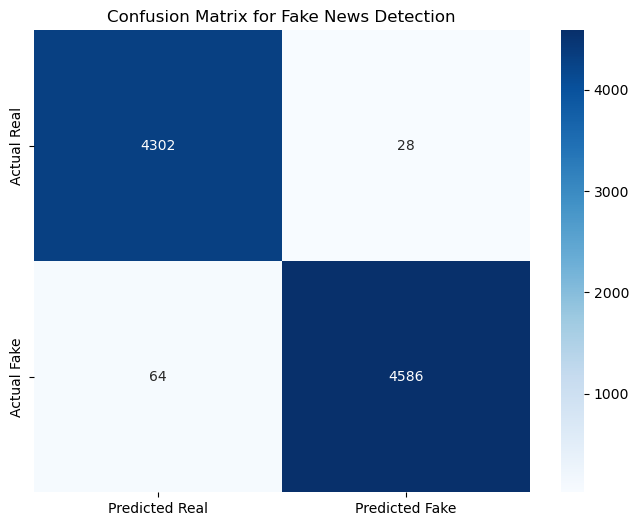

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Real', 'Predicted Fake'],
            yticklabels=['Actual Real', 'Actual Fake'])
plt.title('Confusion Matrix for Fake News Detection')
plt.show()

In [50]:
import joblib
joblib.dump(model, 'model/fn_model.pkl')
joblib.dump(vectorizer, 'model/tfidf_vectorizer.pkl')

['model/tfidf_vectorizer.pkl']

In [42]:
def prepro(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    text = " ".join(tokens)
    return text

In [43]:
def predict(article_text):
    if model and vectorizer:
        cleaned_text = prepro(article_text)
        text_vector = vectorizer.transform([cleaned_text])
        # Make prediction
        prediction = model.predict(text_vector)[0]    
        probability = model.predict_proba(text_vector)[0]
        if prediction == 1:
            return "Fake News", probability[1]
        else:
            return "Real News", probability[0]
    else:
        return "Model not loaded. Cannot make prediction."


In [47]:
article = """ CAIRO/JERUSALEM, Aug 24 (Reuters) - Israeli planes and tanks pounded the eastern and northern outskirts of Gaza City overnight Saturday to Sunday, destroying buildings and homes, residents said, as Israeli leaders vowed to press on with a planned offensive on the city.

Witnesses reported the sound of explosions non-stop overnight in the areas of Zeitoun and Shejaia, while tanks shelled houses and roads in the nearby Sabra neighbourhood and several buildings were blown up in the northern town of Jabalia.

The Reuters Daily Briefing newsletter provides all the news you need to start your day. Sign up here.

Fire lit the skies from the direction of the explosions, causing panic, prompting some families to stream out of the city. Others said they would prefer to die and not leave.

The Israeli military said on Sunday that its forces have returned to combat in the Jabalia area in recent days, to dismantle militant tunnels and strengthen control of the area.

It added that the operation there "enables the expansion of combat into additional areas and prevents Hamas terrorists from returning to operate in these areas."

Israel approved a plan this month to seize control of Gaza City, describing it as the last bastion of Hamas militants. It is not expected to begin for a few weeks, leaving room for mediators Egypt and Qatar to try and resume ceasefire talks.

Israel's Defence Minister Israel Katz on Sunday vowed to press on with the offensive on the city where famine has been declared, which has raised alarm abroad and objections at home. Katz has said that Gaza City will be razed unless Hamas agrees to end the war on Israel's terms and release all hostages.

Hamas said in a statement on Sunday that Israel's plan to take over Gaza City showed it wasn't serious about a ceasefire.

It said a ceasefire agreement was "the only way to return the hostages", holding Israeli Prime Minister Benjamin Netanyahu responsible for their lives.

The proposal on the table calls for a 60-day ceasefire and the release of 10 living hostages held in Gaza and of 18 bodies. In turn, Israel would release about 200 long-serving Palestinian prisoners held by Israel.

Item 1 of 4 Palestinian father Mahmoud Abedrabo mourns over the body of his son Hamada, who was killed in an Israeli strike, according to medics, at Al-Shifa Hospital in Gaza City, August 24, 2025. REUTERS/Mahmoud Issa

[1/4]Palestinian father Mahmoud Abedrabo mourns over the body of his son Hamada, who was killed in an Israeli strike, according to medics, at Al-Shifa Hospital in Gaza City, August 24, 2025. REUTERS/Mahmoud Issa Purchase Licensing Rights, opens new tab

Once a temporary ceasefire begins, the proposal is for Hamas and Israel to begin negotiations on a permanent ceasefire that would include the return of the remaining hostages.

On Thursday, Netanyahu said that Israel would immediately resume negotiations for the release of all 50 hostages - of whom Israel believes around 20 are still living - and an end to the nearly two-year-old war but on terms acceptable to Israel.
'HUNGRY AND AFRAID'

Around half of the enclave's two million people currently live in Gaza City. A few thousand have already left, carrying their belongings on vehicles and rickshaws.

"I stopped counting the times I had to take my wife and three daughters and leave my home in Gaza City," said Mohammad, 40, via a chat app. "No place is safe, but I can't take the risk. If they suddenly begin the invasion, they will use heavy fire."

Others said they will not leave, no matter what.

"We are not leaving, let them bomb us at home," said Aya, 31, who has a family of eight, adding that they couldn't afford to buy a tent or pay for the transportation, even if they did try to leave. "We are hungry, afraid and don't have money."

A global hunger monitor said on Friday that Gaza City and surrounding areas are officially suffering from famine that will likely spread. Israel has rejected the assessment and says it ignores steps it has taken since late July to increase aid.

On Sunday, the Gaza health ministry said eight more people died of malnutrition and starvation in the enclave, raising deaths from such causes to 289 people, including 115 children, since the war started. Israel disputes fatality figures by the health ministry in the Hamas-run strip.

The war began on October 7, 2023, when Hamas-led gunmen burst into southern Israel, killing some 1,200 people, mainly civilians, and taking 251 hostages.

Israel's military offensive against Hamas has since killed at least 62,000 Palestinians, mostly civilians, according to the Gaza health ministry, left much of the territory in ruins and internally displaced nearly its entire population.

Reporting by Nidal al-Mughrabi in Cairo, Lili Bayer and Maayan Lubell in Jerusalem; Editing by William Maclean and Ros Russell

Our Standards: The Thomson Reuters Trust Principles., opens new tab

A senior correspondent with nearly 25 years’ experience covering the Palestinian-Israeli conflict including several wars and the signing of the first historic peace accord between the two sides. """

In [48]:
print(article)

 CAIRO/JERUSALEM, Aug 24 (Reuters) - Israeli planes and tanks pounded the eastern and northern outskirts of Gaza City overnight Saturday to Sunday, destroying buildings and homes, residents said, as Israeli leaders vowed to press on with a planned offensive on the city.

Witnesses reported the sound of explosions non-stop overnight in the areas of Zeitoun and Shejaia, while tanks shelled houses and roads in the nearby Sabra neighbourhood and several buildings were blown up in the northern town of Jabalia.

The Reuters Daily Briefing newsletter provides all the news you need to start your day. Sign up here.

Fire lit the skies from the direction of the explosions, causing panic, prompting some families to stream out of the city. Others said they would prefer to die and not leave.

The Israeli military said on Sunday that its forces have returned to combat in the Jabalia area in recent days, to dismantle militant tunnels and strengthen control of the area.

It added that the operation th

In [49]:
check = prepro(article)
predict(check)

('Real News', np.float64(0.9801404126562386))